In [11]:
"""
  @author: Urmzd Mukhamamdnaim, B00800045
  @description Solution for Q1 of CSCI4151's A0.
  @requires Python3.9
"""
import numpy as np
from typing import Tuple, Literal

In [12]:
# NOTE: DELETE THE SEED DURING TESTING. 
np.random.seed(42)
# NOTE: POSSIBLY DELETE THIS LINE IF YOUR NOTEBOOK DOESN'T SUPPORT WIDGETS
%matplotlib widget

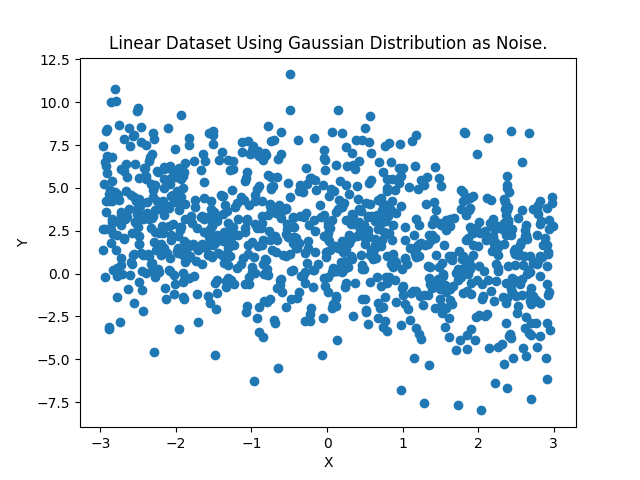

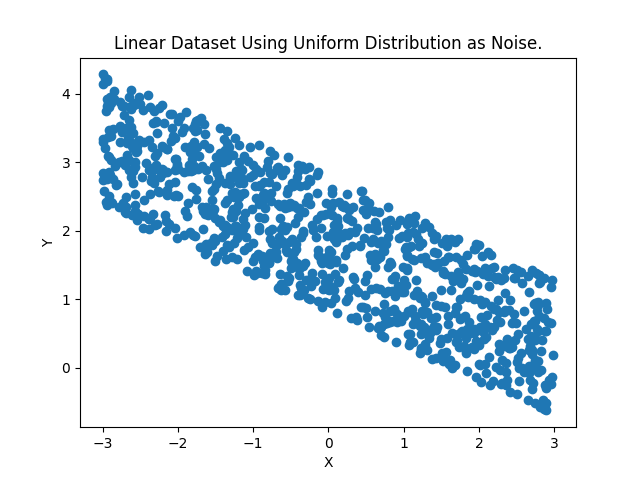

In [13]:
from matplotlib import pyplot as plt

RANGE = Tuple[int, int]

def chooseParams(range:RANGE=(-2,2)) -> np.ndarray:
  """
    @param [optional] range - The inclusive start and end of the uniform space to pick from

    @return - A numpy array of size (2,) where index 0 represents the true weight, and index 1 represents the true bias.

    @example
    // Returns np.ndarray([-0.1, 1.2])
    chooseParams((-2,2))
  """
  return np.random.uniform(range[0], range[1], size=(2,))

NOISE_TYPE = Literal["gaussian", "uniform"]
DATA_SET = Tuple[np.ndarray, np.ndarray]

def generateNoisyLinearData(n: float, xLo: float, xHi: float, w: float, b: float, noiseType: NOISE_TYPE, sigma: float, uniform_range:RANGE=(-1,1)) -> DATA_SET:
  """
    @param n - The number of samples to generate.
    @param xLo - The starting domain value.
    @param xHi - The ending domain value.
    @param w - The linear function's scale factor.
    @param b - The additional translation to apply.
    @param noiseType - The type of noise to include in the function.
    @param [sigma] - If "gaussian" noiseType is selected, this parameter specifies the desired standard deviation.

    @return - A tuple containing the generated X and Y values.
  """

  # Generate a collection of `n` samples in the range [xLo, xHi]
  x = np.random.uniform(xLo, xHi, size=(n,))
  mu = 0
  noise = np.random.uniform(*uniform_range, size=(n,)) if noiseType == "uniform" else np.random.normal(mu, sigma, size=(n,))
  y = w * x + b + noise
  return x,y

def plotLinearData(x: np.ndarray, y: np.ndarray, noiseType:NOISE_TYPE="uniform") -> None:
  """
    @param x - The domain values to plot.
    @param y - The range values to plot.
    @param [noiseType] - The type of noise used to generate the dataset.
  """
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ax.set_title(f"Linear Dataset Using {noiseType.title()} Distribution as Noise.")
  ax.set_xlabel("X")
  ax.set_ylabel("Y")

  plt.show()

xLo, xHi = (-3., 3.)
sigma = 3
n = 1000
w_gen, b_gen = chooseParams()
plotLinearData(*generateNoisyLinearData(n, xLo, xHi, w_gen, b_gen, "gaussian", sigma), "gaussian")
plotLinearData(*generateNoisyLinearData(n, xLo, xHi, w_gen, b_gen, "uniform", sigma), "uniform")

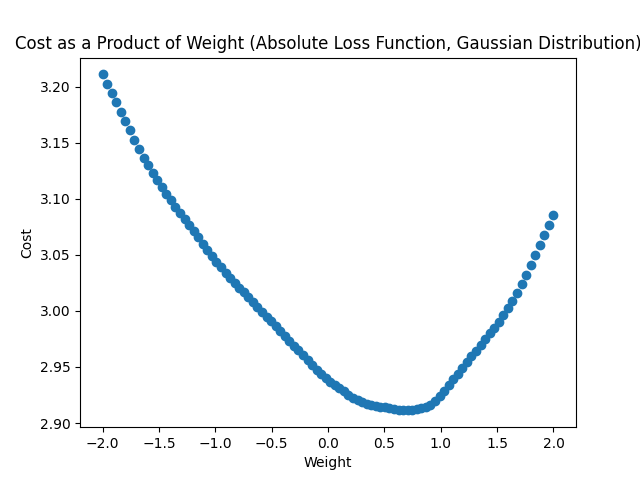

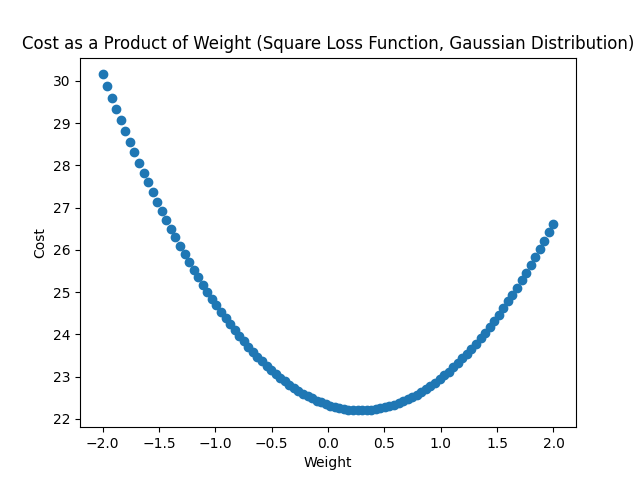

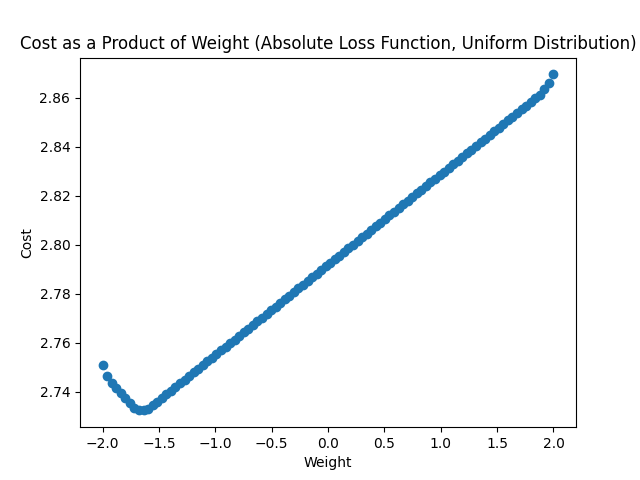

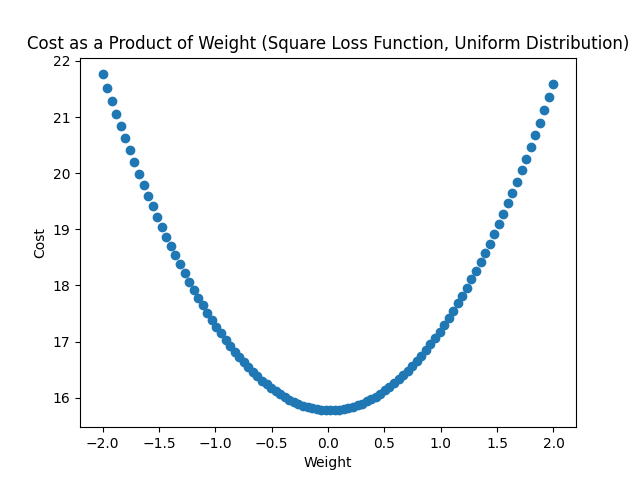

In [14]:
"""
  @author Urmzd Mukhammadnaim
  @description Solution for Q2 of CSCI4155's A0.
  @requires Python3.9
"""

import numpy as np
from matplotlib import pyplot as plt
from typing import Literal

LOSS_TYPE = Literal["absolute", "squared"]

def loss(w: float, b: float, x: np.ndarray, ytrue: np.ndarray, lossType: LOSS_TYPE) -> np.ndarray:
  """
    @param w - The weight of the predicted Y value.
    @parma b - The bias of the preidcted Y value.
    @param x - The X value from which to predict the Y value from.
    @param ytrue - The true Y value.
    @pram lossType - The loss function to apply.

    @return - A numpy array of size (len(x),) containing the loss function for each associated `x` value.

    @example
    // Returns [2]
    loss(2, 1, [3], 9, "absolute")
  """
  y_pred = w * x + b
  loss = y_pred - ytrue
  return np.abs(loss) if lossType == "absolute" else np.square(loss)

def cost(w: float, b: float, dataset: DATA_SET, lossType: LOSS_TYPE) -> np.floating:
  """
    @param w - The estimated weight for the predicted Y vector.
    @param b - The estimated bias for the predicted Y vector.
    @param dataset - A tuple of (X, Y) values.
    @param lossType - The loss function to apply to each value in the X vector.

    @return - The average loss of every value associated with the dataset.
  """
  x, y = dataset;

  losses = loss(w, b, x, y, lossType)
  cost = np.average(losses)
  return cost / 2

def plot_cost(b: float, dataset: DATA_SET, lossType: LOSS_TYPE, noiseType: NOISE_TYPE = "uniform") -> None:
  """
    @param b - The bias to use when predicting the Y values.
    @param dataset - The dataset to predict and compare Y values from.
    @param lossType - The loss function to use when calculating the error.
    @param noiseType - The type of noise that has been applied to the dataset.

    @return - Displays a plot demonstrating the relationship between cost as a dependency of weight.
  """
  _, ax = plt.subplots()

  w_space = np.linspace(-2, 2, 100, True)
  costs = np.array([cost(w, b, dataset, lossType) for w in w_space])

  ax.scatter(w_space, costs)
  ax.set_title(f"Cost as a Product of Weight ({lossType.title()} Loss Function, {noiseType.title()} Distribution)")
  ax.set_xlabel(f"Weight")
  ax.set_ylabel("Cost")
  plt.show()

xLo, xHi = (-3, 3)
n = 100
sigma = 3
w, b = chooseParams()
gaussian_dataset = generateNoisyLinearData(n, xLo, xHi,w, b, "gaussian", sigma)
uniform_dataset = generateNoisyLinearData(n, xLo, xHi, w, b, "uniform", sigma)
plot_cost(4, gaussian_dataset, "absolute", "gaussian")
plot_cost(4, gaussian_dataset, "square", "gaussian")
plot_cost(4, uniform_dataset, "absolute")
plot_cost(4, uniform_dataset, "square")


#### Prefix

There are multiple factors to take into account when analyzing the cause of the lowest possible cost for any dataset.
In our case, there are implicit, explicit, dependent and indepedent parameters which determine the lower bound of the cost function.

**Terminology**

- Implicit: Hard-coded values.
- Explicit: Values passed by reference or value.
- Independent: Is disjoint and does not require further parameters.
- Dependent: Must be used with other parameters to see effects.

**Factor 1 - `noiseType`**

The first explicit and dependent factor is `noiseType`. 

In cases where the `noiseType` is `uniform`, the range provided to the uniform distribution will determine how low the cost can get. The wider the uniform distribution's range is, and the further in proximity the generated values are from the true bias, the greater the cost will be. You can expect to have a lower cost in a linear equation with noise generated from a uniform distribution only when the range is small and in close proximity to the true bias.

In the other case, when `noiseType` is `gaussian`, the `sigma` provided to the Gaussian distribution will be the parameter which determines the lowest possible cost. You can expect to have lower costs as `sigma` nears 0.

**Factor 2 - `lossType`**

The second explicit and depdendent factor is `lossType`.

The `square lossType` will provide a lower cost than it's counterpart `absolute` when the average loss is less than `1`, otherwise `absolute` will produce the lower cost.

**Conclusion**

In short, `noiseType`, `lossType` and their associated independent parameters are responsible in increased and decreased costs.


In [15]:
"""
  @author Urmzd Mukhammadnaim, B00800045
  @description Solution of Q3a for CSCI 4155's A0.
"""
import numpy as np
from matplotlib import pyplot as plt


def plot_3d_graph(dataset: DATA_SET, show_contour=False, lossType: LOSS_TYPE = "square") -> None:
  W = np.linspace(-5, 5, 1000)
  B = np.linspace(-5, 5, 1000)

  C = np.array([cost(w, b, dataset, lossType) for w in W for b in B])

  W, B = np.meshgrid(W, B)
  C = C.reshape(W.shape)

  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  if show_contour:
    ax.remove()
    ax = fig.add_subplot()
    ax.contourf(W, B, C)
  else:
    ax.plot_surface(W, B, C)
  ax.set_xlabel("Weight")
  ax.set_ylabel("Bias")
  if not show_contour:
    ax.set_zlabel("Cost")
    ax.set_title("Cost as a product of Bias and Weight")


  plt.show()

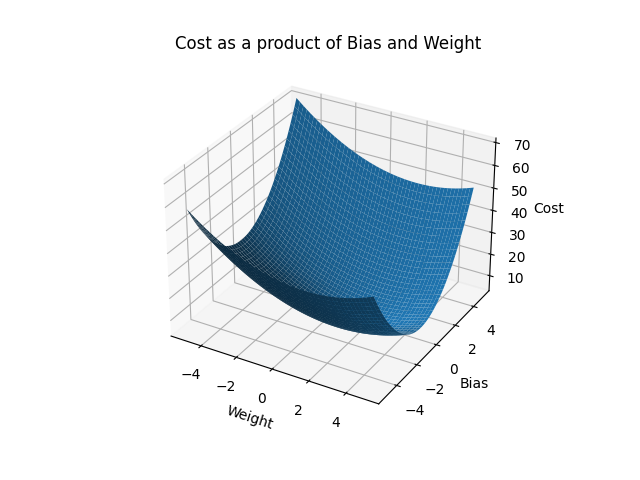

In [16]:
xLo, xHi = (-3., 3.)
sigma = 3
n = 1000
w_gen, b_gen = chooseParams()
dataset = generateNoisyLinearData(n, xLo, xHi, w_gen, b_gen, "gaussian", sigma)
plot_3d_graph(dataset)

#### Question 3b)

![Contour Plot](./contour-plot-sketch.png)

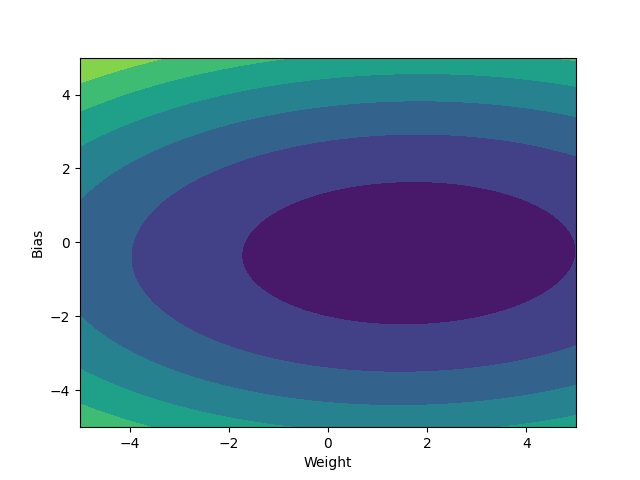

In [17]:
plot_3d_graph(dataset, show_contour=True)

#### Question 3c)

Given the graphs above, the lowest cost is achieved at approximately $w=1.5$ and $b=-0.2$

#### Question 4

Cost:
$$
  C \frac{0}{2N} \cdot \sum_{i=1}^{i=N}{(y_{p_i} - y_{i})^2}
$$

Cost as a Vector: 
$$
 C = \frac{1}{2N} \cdot (w_{p}x_{i} + b_{p} - y_{i})^2
$$


#### 4a)

**Find Derivative**
$$ 
  \frac{\partial{C}}{\partial{b_{p}}} = \frac{-b_{p} + y_i}{N}
$$

**Find Minima**
$$ 
\begin{gather*}
\frac{\partial{C}}{\partial{b_{p}}} = \frac{-b_{p} + y_i}{N}\\
0 = \frac{-b_{p} + y_{i}}{N}\\
\therefore{b_{p} = y{i}}
\end{gather*}
$$


**Sanity Check**
$$
\therefore{b_{p} = b_{true}} \gets {y_{i} = b_{true}}
$$

#### 4b)

**Find The Derivatives**
$$
  \frac{\partial{C}}{\partial{w_{p}}} = \frac{(w_{p}x_{i} - y_{i}) \cdot w_{p}}{N}
$$


**Find The Minima**
$$
\begin{gather*}
 \frac{\partial{C}}{\partial{w_{p}}} = \frac{(w_{p}x_{i} - y_{i}) \cdot w_{p}}{N}\\
 \frac{w_{p}(w_{p}x_{i} - y_{i})}{N} = 0\\
 w_{p}x_{i} - y_{i} = 0\\
\therefore{w_{p} = \frac{y_{i}}{x_{i}}}
\end{gather*}
$$

**Sanity Check**
$$
  w_{p}= w_{true} \gets y_{i} = w_{true}x_{i}
$$

#### Question 4c)

**Find The Derivatives**
$$
  \begin{gather*}
  \frac{\partial{C}}{\partial{w_{p}}} = \frac{(w_{p}x_{i} + b_{p} - y_i) \cdot x_{i}}{N}\\
  \frac{\partial{C}}{\partial{b_{p}}} = \frac{w_{p}x_{i} + b_{p} - y_{i}}{N}\\
  0 = \frac{\partial{C}}{\partial{w_{p}}} + \frac{\partial{C}}{\partial{b_{p}}}\\
  -\frac{\partial{C}}{\partial{w_{p}}} = \frac{\partial{C}}{\partial{b_{p}}}\\
  - \frac{(w_{p}x_{i} + b_{p} - y_i) \cdot x_{i}}{N} = \frac{w_{p}x_{i} + b_{p} - y_{i}}{N}\\
  - (w_{p}x_{i} + b_{p} - y_i) \cdot x_{i} = w_{p}x_{i} + b_{p} - y_{i}\\
  -w_{p}x_{i}^2 - b_{p}x_{i} + y_{i}x_{i} = w_{p}x_{i} + b_{p} - y_{i}\\
  w_{p}x_{i}^2 - w_{p}x_{i} + b_{p}x_{i} - b_{p}  = y_{i} + y_{i}x_{i}\\
  w_{p}x_{i} \cdot (x_{i}+1) + b_{p} \cdot (x_{i}+1)  = y_{i} \cdot (x_{i}+1) \\
  \therefore{w_{p}x_{i}  + b_{p}  = y_{i}}  \\
  \end{gather*}
$$

**Sanity Check**
$$ w_{p}x_{i}  + b_{p} = w_{true}x_{i} + b_{true} \gets y_{i} =  w_{true}x_{i} + b_{true} $$




#### Question 5

#### Question 5a)

**Find The Derivatives**
$$
  \begin{gather*}
  \frac{\partial{C}}{\partial{w_{p}}} = \frac{(w_{p}x_{i} + b_{p} - y_i) \cdot x_{i}}{N}\\
  \frac{\partial{C}}{\partial{b_{p}}} = \frac{w_{p}x_{i} + b_{p} - y_{i}}{N}\\
  0 = \frac{\partial{C}}{\partial{w_{p}}} + \frac{\partial{C}}{\partial{b_{p}}}\\
  -\frac{\partial{C}}{\partial{w_{p}}} = \frac{\partial{C}}{\partial{b_{p}}}\\
  - \frac{(w_{p}x_{i} + b_{p} - y_i) \cdot x_{i}}{N} = \frac{w_{p}x_{i} + b_{p} - y_{i}}{N}\\
  - (w_{p}x_{i} + b_{p} - y_i) \cdot x_{i} = w_{p}x_{i} + b_{p} - y_{i}\\
  -w_{p}x_{i}^2 - b_{p}x_{i} + y_{i}x_{i} = w_{p}x_{i} + b_{p} - y_{i}\\
  w_{p}x_{i}^2 - w_{p}x_{i} + b_{p}x_{i} - b_{p}  = y_{i} + y_{i}x_{i}\\
  w_{p}x_{i} \cdot (x_{i}+1) + b_{p} \cdot (x_{i}+1)  = y_{i} \cdot (x_{i}+1) \\
  \therefore{w_{p}x_{i}  + b_{p}  = y_{i}}  \\
  \end{gather*}
$$

**Sanity Check**
$$ w_{p}x_{i}  + b_{p} = w_{true}x_{i} + b_{true} \gets y_{i} =  w_{true}x_{i} + b_{true} $$




In [18]:
"""
  @author Urmzd Mukhammadnaim
  @description Solution for question 5b of CSCI's 4155 A0.
"""
def computeDeriv_dC_db(b: float, w: float, X: np.ndarray, Y: np.ndarray) -> float:
  """
    Derive the cost with respect to the bias.
    @param b - The bias value to caluclate the cost with.
    @param w - The predicted weight.
    @param X - X values to transform.
    @param Y - True Y's.
  """
  derivative = np.average((w*X + b - Y))
  return derivative 

def computeDeriv_dC_dw(b: float, w: float, X: np.ndarray, Y: np.ndarray) -> float:
  """
    Derive the cost with respect to the weight.
    @param b - Bias associated with cost.
    @param w - The weight value to calculate the cost with. 
    @param X - X values to transform.
    @param Y - True Y's.
  """
  derivative = np.average(((w * X + b - Y) * X))
  return derivative 

#### Question 5c)

**Optimal Simplification**

```typescript
computeDeriv_dC_db => 1/N * (w*X + y_i - y_i) => w*X / N
```

```typescript
computeDeriv_dc_dw => 1/N * (w*X**2 + bX - YX) => (Y/X)*X**2 + b*X + Y*X => b*X /N
```

**Direction Check**

You can discover the direction of the vector by doing a simple check. If you move the bias away from optimum, cost should increase. Similarly, the former rule applies to weight.



In [19]:
"""
  @author - Urmzd Mukhammadnaim
  @description - Solution for question 6 of CSCI 4155.
"""
WEIGHT_BIAS_PAIR = Tuple[np.ndarray, np.ndarray, np.ndarray]
def updateParams(w: np.ndarray, b: np.ndarray, X: np.ndarray, Y: np.ndarray, alpha: float, epochs: int) -> WEIGHT_BIAS_PAIR:
  """
    @param w - Starting weight.
    @param b - Starting bias.
    @param X - True X's.
    @param Y - True Y's.
    @param alpha - learning rate.
    @param epoch - number of iterations to update and modify gradient.
    
    @returns - (W, B, E)
  """
  w_vec = np.zeros(shape=(epochs+1,))
  b_vec = np.zeros(shape=(epochs+1,))
  error_vec = np.zeros(shape=(epochs+1,))
  w_vec[0] = w;
  b_vec[0] = b;
  error_vec[0] = cost(w, b, (X, Y), "square")

  for i in range(1, epochs+1):
    w_deriv = computeDeriv_dC_dw(b, w, X, Y)
    b_deriv = computeDeriv_dC_db(b, w, X, Y)
    w = w_vec[i] = w - alpha * w_deriv 
    b = b_vec[i] = b - alpha * b_deriv
    error_vec[i] = cost(w, b, (X, Y), "square")

  return w_vec, b_vec, error_vec 

In [20]:
%matplotlib inline
"""
  @author - Urmzd Mukhammadnaim
  @description - Question 6B for CSCI 4155
"""
w, b = chooseParams()
X, Y = generateNoisyLinearData(100, -10, 10, w, b, "gaussian", 2.3)
w_random, b_random = chooseParams()
alpha = 0.01
W, B, E = updateParams(w_random, b_random, X, Y, alpha, 10000)
print(W[-1], w, B[-1], b, E[-1], "TRUEW PRED TRUEB PRED E")

-0.6353839626407006 -0.617519324396842 0.47389127970548417 0.4860292445523364 2.7787394198762927 TRUEW PRED TRUEB PRED E


In [40]:
def plot_cost_wrt_epochs(error_vec: np.ndarray = E, alpha: float=alpha) -> None:
  _, ax = plt.subplots()

  ax.set_title(f"Cost with respect to # of Epochs, LR = {alpha}")
  ax.set_xlabel("# of Epochs")
  ax.set_ylabel("Cost")
  ax.grid(True, "both", "both")
  ax.plot(error_vec)

/home/urmzd/.pyenv/versions/3.10.0/envs/a0q8/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_31632/2007500731.py:29: RuntimeWarning: overflow encountered in square
  return np.abs(loss) if lossType == "absolute" else np.square(loss)
/home/urmzd/.pyenv/versions/3.10.0/envs/a0q8/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_31632/379053584.py:27: RuntimeWarning: invalid value encountered in double_scalars
  w = w_vec[i] = w - alpha * w_deriv
/tmp/ipykernel_31632/2398041327.py:24: RuntimeWarning: overflow encountered in multiply
  derivative = np.average(((w * X + b - Y) * X))
/tmp/ipykernel_31632/2007500731.py:27: RuntimeWarning: overflow encountered in multiply
  y_pred = w * x + b
/tmp/ipykernel_31632/2398041327.py:13

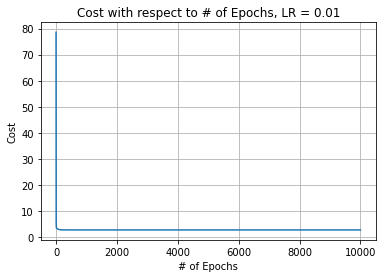

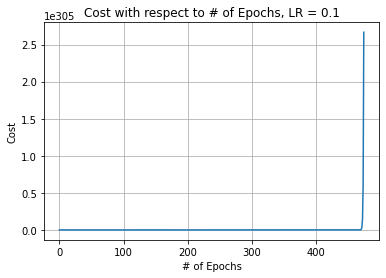

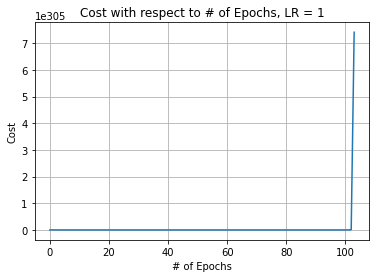

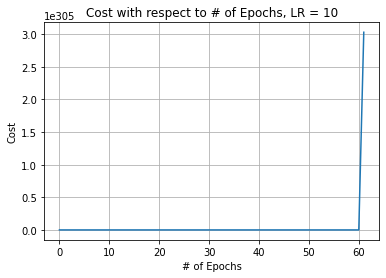

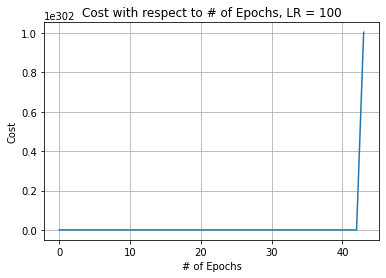

In [22]:
plot_cost_wrt_epochs()
_, _, E1 = updateParams(w_random, b_random, X, Y, 0.1, 10000)
_, _, E2 = updateParams(w_random, b_random, X, Y, 1, 10000)
_, _, E3 = updateParams(w_random, b_random, X, Y, 10, 10000)
_, _, E4 = updateParams(w_random, b_random, X, Y, 100, 10000)
plot_cost_wrt_epochs(E1, 0.1)
plot_cost_wrt_epochs(E2, 1)
plot_cost_wrt_epochs(E3, 10)
plot_cost_wrt_epochs(E4, 100)

In [105]:
def plot_contour_plot_with_parameter_markers(W=W, B=B) -> None:
  _, ax = plt.subplots(figsize=(10, 10))

  ax.tricontour(W, B, E, 100, alpha=0.5, cmap="BuPu")
  ax.plot(W[0], B[0], 'rx', zorder=1, label="Starting W, B", linewidth=2, markersize=10)
  ax.plot(W[1:-1], B[1:-1], 'c.', zorder=1, label="Intermediate W, B", linewidth=2, markersize=10)
  ax.plot(W[-1], B[-1], 'bo', zorder=1, label="Ending W, B", linewidth=2, markersize=10)
  ax.set_label("Weight")
  ax.set_label("Bias")
  ax.set_title("Cost as a product of Weight and Bias")
  ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

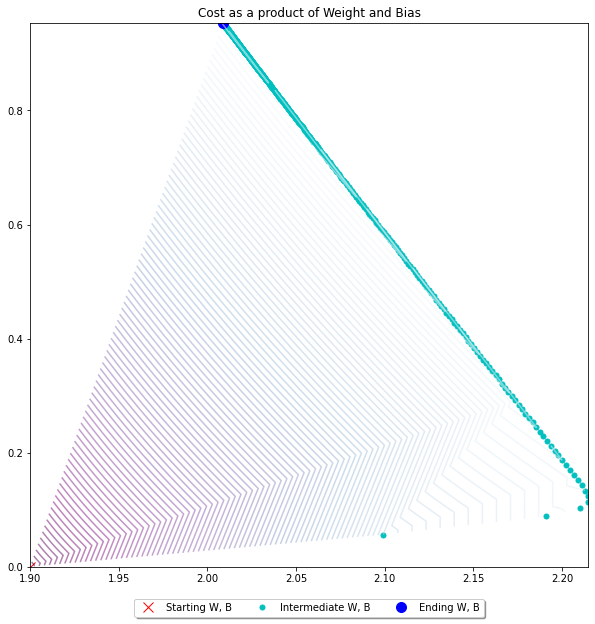

In [106]:
plot_contour_plot_with_parameter_markers()

**Question 6B**

With higher learning rates, the cost might reach near optimum values quickly but as the number of epochs increase, will diverge (as seen in the later cost-epoch charts).

With lower learning rates, the cost function will take a longer period of time to hit near-optimum values, having a asymptomic-like behaviour as epochs continue.

In [25]:
"""
  @author Urmzd Mukhammadnaim
  @description Answer for Question #7 of CSCI 4155 A0. 
"""
def regularizer(w: np.floating, b: np.floating, Lambda: float) -> np.floating: 
  """
    @param L - The parameter to penalize.
    @param w - The updated weight.
    @param b - The updated bias.
    @param Lambda - The regularization factor.
  """
  return (Lambda/2  * (np.power(w, 2) + np.power(b, 2)))

WEIGHT_BIAS_ERROR_PAIR = Tuple[np.ndarray, np.ndarray, np.ndarray]
def updateParamsWithReg(w: np.ndarray, b: np.ndarray, X: np.ndarray, Y: np.ndarray, alpha: float, epochs: int, Lambda: float) -> WEIGHT_BIAS_ERROR_PAIR:
  """
    @param w - Starting weight.
    @param b - Starting bias.
    @param X - True X's.
    @param Y - True Y's.
    @param alpha - learning rate.
    @param epoch - number of iterations to update and modify gradient.
    @param Lambda - the penalizing/regularization factor.
    
    @returns - (W, B, E) -> Weight, Bias, Error
  """
  w_vec = np.zeros(shape=(epochs+1,))
  b_vec = np.zeros(shape=(epochs+1,))
  error_vec = np.zeros(shape=(epochs+1,))

  w_vec[0] = w;
  b_vec[0] = b;
  reg_fac = regularizer(w, b, Lambda)
  error_vec[0] = cost(w, b, (X, Y), "square") + reg_fac

  for i in range(1, epochs+1):
    reg_fac = regularizer(w, b, Lambda)
    w_deriv = computeDeriv_dC_dw(b, w, X, Y)
    b_deriv = computeDeriv_dC_db(b, w, X, Y)
    w = w - alpha * w_deriv + reg_fac 
    b = w - alpha * b_deriv + reg_fac 
    w_vec[i] = w 
    b_vec[i] = b 
    error_vec[i] = cost(w, b, (X, Y), "square")

  return w_vec, b_vec, error_vec 

In [26]:
W6, B6, E6 = updateParamsWithReg(w, b, X, Y, 0.01, 10000, 0.01)
print(w, W6[-1], b, B6[-1], E6[-1], "WTRUE, WPRED, BTRUE, BPRED, COST")

-0.617519324396842 -0.6345325439628093 0.4860292445523364 -0.6196611055611777 3.376991497834782 WTRUE, WPRED, BTRUE, BPRED, COST


# Question 8

---

> Author: Urmzd Mukhammadnaim

> Banner Id: B00800045

> Description: Solution for CSCI 4155's A0 Q8

> Requires: Python 3.10.0+

## Question 8.a)

[0.79789037 1.52203538 1.80647317 0.97661963 5.26263264 2.65223257
 4.92472186 4.48430379 0.78381631 2.14432315 3.86084074 5.26193022
 0.8175654  5.7202892  5.3446168  2.9879186  2.65577549 4.72470216
 3.36616737 5.89151479 3.32414323 2.43845788 5.39989722 2.37493113
 3.37860914 3.26887048 1.92583873 2.38585091 4.03746138 5.70749966
 3.95173742 4.67478375 0.80263431 0.71774864 3.42664257 1.53625532
 5.00952157 0.04676875 4.21886283 5.12710653 4.28958762 2.54611622
 1.60066607 4.60154854 3.97539642 5.32434816 3.86295528 0.71804125
 3.64949437 1.97803585 6.24780984 3.90442344 1.87880332 5.31676566
 3.34884603 2.95220124 5.48176363 1.96272099 0.84158755 3.01893928
 4.86928041 5.0241805  0.19366048 5.56316897 4.55477212 1.94065065
 2.41973949 6.07969595 4.80585883 5.56349802 5.19654709 4.29076539
 3.69972122 1.41745185 3.42247296 5.46163332 0.19371211 5.54951868
 1.62822884 5.62164054 2.37649205 3.40063208 0.07234463 4.79421834
 3.39785705 0.49870621 5.43296481 2.7939374  0.61220125 4.1249

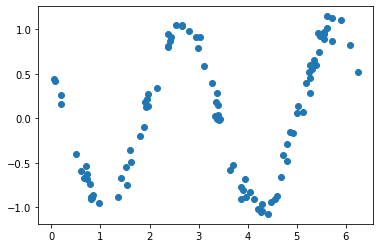

In [28]:
import numpy as np
import matplotlib.pyplot as plt

x, y = np.load("dataset_cos.npy")
print(x, y)

# Verify function is child of Cos function.
_, ax = plt.subplots()
ax.scatter(x, y)

## Question 8.b)

100 100
5001
0.12553556301669086 -0.39413376964861646
0.24635052732099738 0.22196242346650508


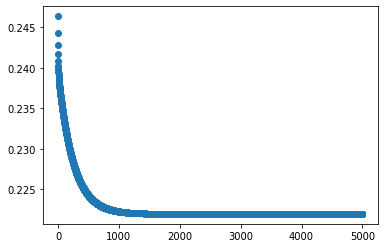

In [29]:
print(x.size, y.size)
W, B, E = updateParams(0, 0, x, y, 0.01, 5000)
print(E.size)
print(W[-1], B[-1])
print(E[0], E[-1])

_, ax = plt.subplots()
ax.scatter(list(range(E.size)), E)

$$ 
  \begin{aligned}
  \mathcal{C} &= \frac{1}{N} \cdot \sum_{i=1}^{N}{(0 - \cos{(2x + 1)})^2}\\
    &= \frac{1}{N} \cdot \sum_{i=1}^{N}{\cos^2{(2x + 1)}}
  \end{aligned}
$$



In [127]:
analytical_cost = np.average(x**2) 
print (f"Analytical Cost: {analytical_cost}, Gradient Descent COST: {E[-1]}")

Analytical Cost: 14.260889580072494, Gradient Descent COST: 0.00866729069818096


**Conclusion**

The analytical cost is approximately $14.26$ whereas the cost derived using gradient descent is approximately $0.22$.
The two values differ by a little under $70$ magnitudes. 

## Question 8.c)
The parameter update RULES remain roughly the same. 
However, the cost function, as well as the associated derivatives require an update to reflect the new base function $f(w,b, x) = cos(wx + b)$. 

--- 

The updated cost function

---
$$
  \begin{aligned} 
      \mathcal{C} &= \frac{1}{2N} \cdot \sum_{i=1}^{N}{(\cos(wx+b) - y)^2}\\ 
      &= \frac{1}{2} {(\cos(wx+b) - y)^2} \\ 
  \end{aligned}
$$

---

The derivative of cost with respect to $\mathcal{w}$

---

$$
  \begin{aligned}
    \frac{\partial{\mathcal{C}}}{\partial{w}} &= \frac{(-2x\sin(wx+b)(\cos(wx + b) - y))}{N}
  \end{aligned}
$$

---

The derivative of cost with respect to $\mathcal{b}$

---

$$
  \begin{aligned}
    \frac{\partial{\mathcal{C}}}{\partial{b}} &= \frac{-2\sin(wx+b)(\cos(wx + b) - y)}{N}
  \end{aligned}
$$

---

At this point, we have two options. We can solve it analytically, or we could use gradient descent.

Assuming, we went forward with the batch gradient descent algorithm we previously implemented, we would need to update the derivatives and cost function with those listed above. We would then set a specified number of iterations and a learning rate in an attempt to estimate the weight.

---



In [141]:
def plot_cost_wrt_epochs(error_vec: np.ndarray, alpha: float, w: float) -> None:
  _, ax = plt.subplots(figsize=(10,10))

  ax.set_title(f"Cost with respect to # of Epochs, LR = {alpha}, W_init={w}")
  ax.set_xlabel("# of Epochs")
  ax.set_ylabel("Cost")
  ax.grid(True, "both", "both")
  ax.plot(error_vec)

def computeDeriv_dC_dw(b: float, w: float, X: np.ndarray, Y: np.ndarray) -> float:
  a = -2 * X * (np.sin(w * X + b))
  b = np.cos(w * X + b) - Y
  N = X.shape[0]
  return a.dot(b) / N

def computeDeriv_dC_db(b, w, X, Y) -> float:
  a = -2 * np.sin(w * X + b)
  b = np.cos(w * X + b) - Y
  N = X.shape[0]
  return a.dot(b) / N

def loss(w: float, b: float, x: np.ndarray, ytrue: np.ndarray, lossType: LOSS_TYPE) -> np.ndarray:
  y_pred = np.cos(w * x + b)
  loss = y_pred - ytrue
  return np.abs(loss) if lossType == "absolute" else np.square(loss)

def cost(w: float, b: float, dataset: DATA_SET, lossType: LOSS_TYPE) -> np.floating:
  x, y = dataset;

  losses = loss(w, b, x, y, lossType)
  cost = np.average(losses)
  return cost

def updateParams(w: np.ndarray, b: np.ndarray, X: np.ndarray, Y: np.ndarray, alpha: float, epochs: int) -> WEIGHT_BIAS_PAIR:
  w_vec = np.zeros(shape=(epochs+1,))
  b_vec = np.zeros(shape=(epochs+1,))
  error_vec = np.zeros(shape=(epochs+1,))

  w_vec[0] = w;
  b_vec[0] = b;
  error_vec[0] = cost(w, b, (X, Y), "square")

  for i in range(1, epochs+1):
    w_deriv = computeDeriv_dC_dw(b, w, X, Y)
    b_deriv = computeDeriv_dC_db(b, w, X, Y)
    w = w_vec[i] = w - alpha * w_deriv 
    b = b_vec[i] = b - alpha * b_deriv
    error_vec[i] = cost(w, b, (X, Y), "square")

  return w_vec, b_vec, error_vec 

## Question 8.d)

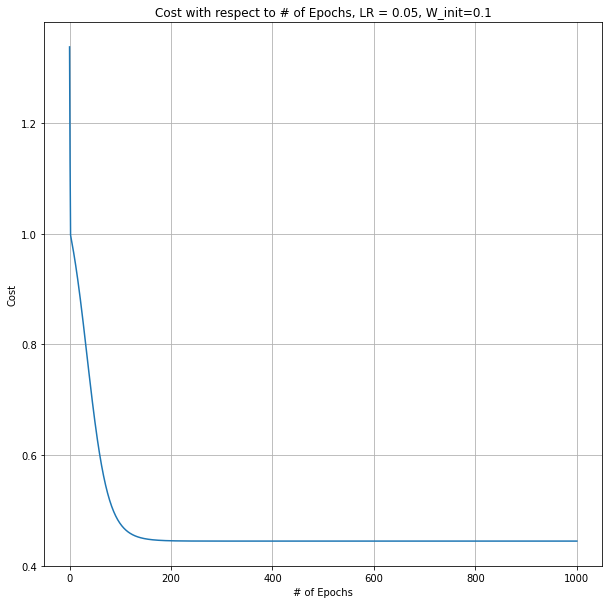

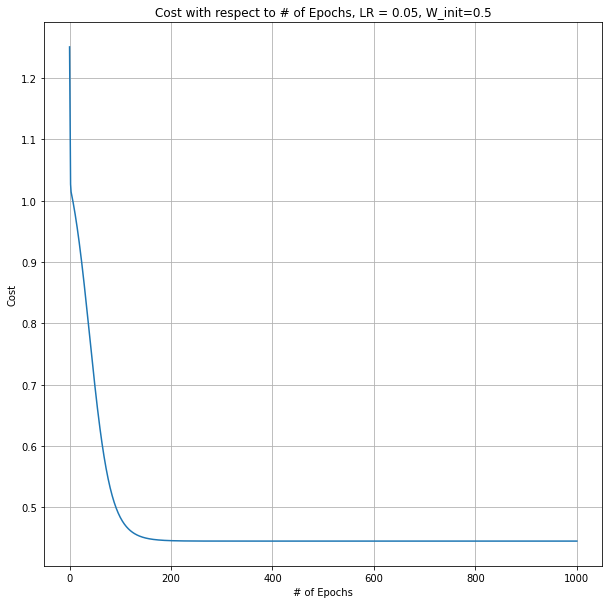

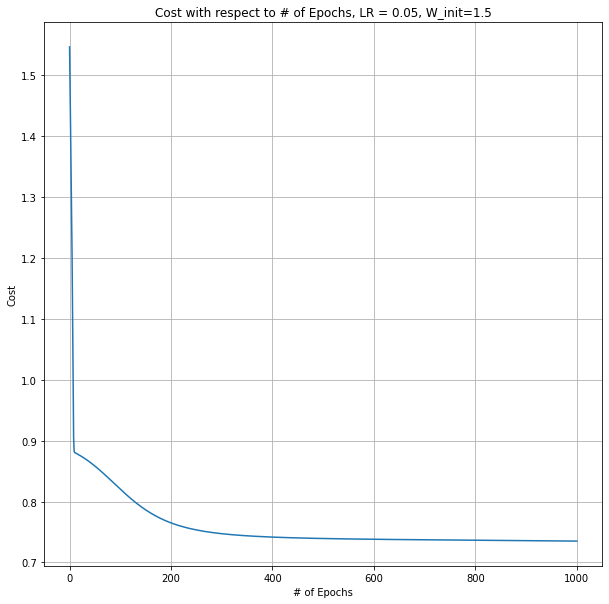

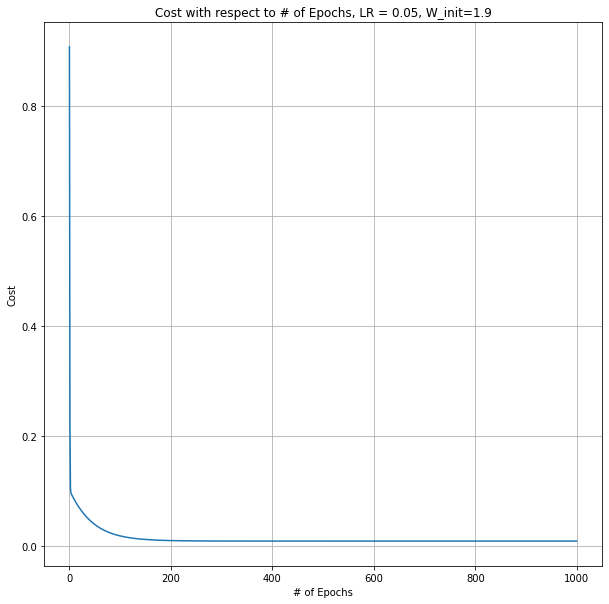

In [125]:
for w in [0.1, 0.5, 1.5, 1.9]:
  alpha = 0.05
  epochs = 1000
  W, B, E = updateParams(w, 0, x, y, alpha, epochs)
  plot_cost_wrt_epochs(E, alpha, w)

**Conclusion**

As seen below, the cost function has a trignometric base. Due to this, there are multiple local extremas. As seen above, certain weights near these extremums have the possibility of approaching a non global optimum, resulting in costs having asymptomic like behaviour (plateauing) far above the desired cost, $0$, as seen in examples where $w<1.9$. 

0 2 2 2
1 2 2 2


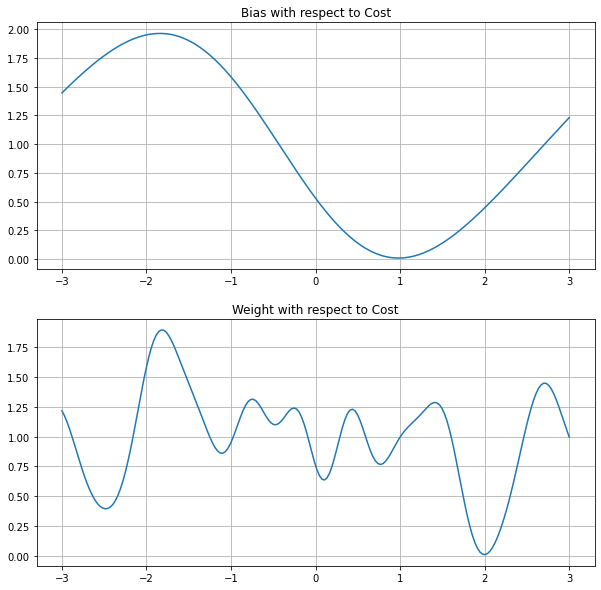

In [140]:
_, axs = plt.subplots(2, 1, figsize=(10, 10))

w = np.linspace(-3, 3, 200)
b = np.linspace(-3, 3, 200)

cs = [
        np.array([cost(2, b[i], (x, y), "square") for i in range(len(b))]),
        np.array([cost(w[i], 1, (x, y), "square") for i in range(len(w))])
]

titles = [
        "Bias with respect to Cost",
        "Weight with respect to Cost"
]

parameter = [
        b, 
        w
]

for i, ax in enumerate(axs):
        print(i, len(parameter), len(titles), len(cs))
        ax.plot(parameter[i], cs[i])
        ax.set_title(titles[i])
        ax.grid()

## Question 8.e) 


In [159]:
def updateParams(w: np.ndarray, b: np.ndarray, X: np.ndarray, Y: np.ndarray, alpha: float, epochs: int, mu: float = 0.99) -> WEIGHT_BIAS_PAIR:
  m_w_vec = np.zeros(shape=(epochs + 1))
  m_b_vec = np.zeros(shape=(epochs + 1))

  w_vec = np.zeros(shape=(epochs+1,))
  b_vec = np.zeros(shape=(epochs+1,))
  error_vec = np.zeros(shape=(epochs+1,))

  m_w = 0
  m_b = 0

  m_w_vec[0] = m_w;
  m_b_vec[0] = m_b;

  w_vec[0] = w;
  b_vec[0] = b;

  error_vec[0] = cost(w, b, (X, Y), "square")

  for i in range(1, epochs+1):
    w_deriv = computeDeriv_dC_dw(b, w, X, Y)
    b_deriv = computeDeriv_dC_db(b, w, X, Y)

    m_w = m_w_vec[i] = mu * m_w_vec[i - 1] + w_deriv
    m_b = m_b_vec[i] = mu * m_b_vec[i - 1] + b_deriv

    w = w_vec[i] = w - alpha * m_w
    b = b_vec[i] = b - alpha * m_b

    error_vec[i] = cost(w, b, (X, Y), "square")

  return w_vec, b_vec, error_vec 


0.1 INIT

0.5 INIT

1.5 INIT

1.9 INIT


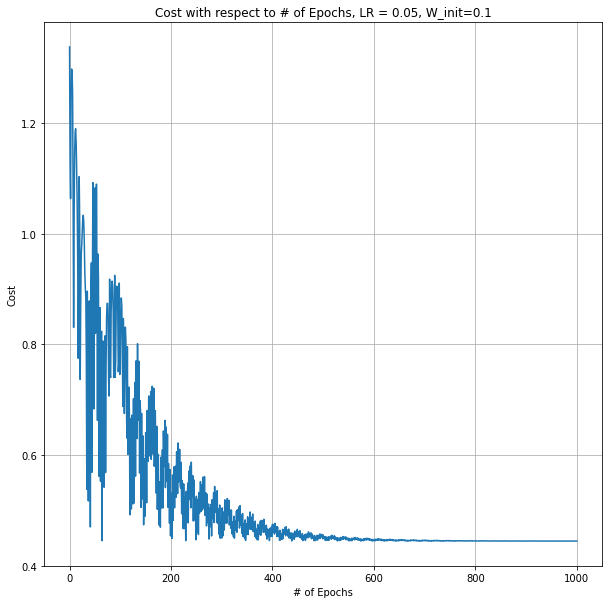

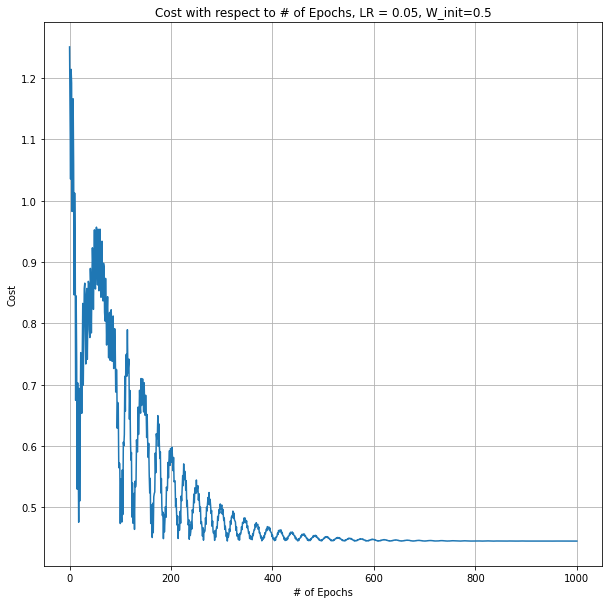

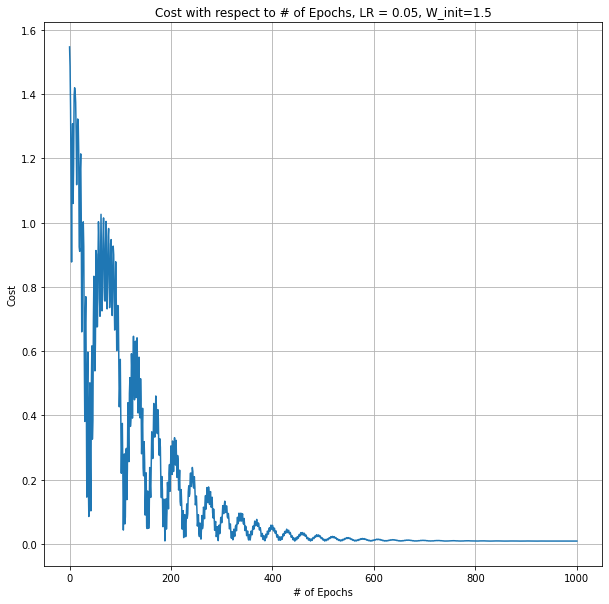

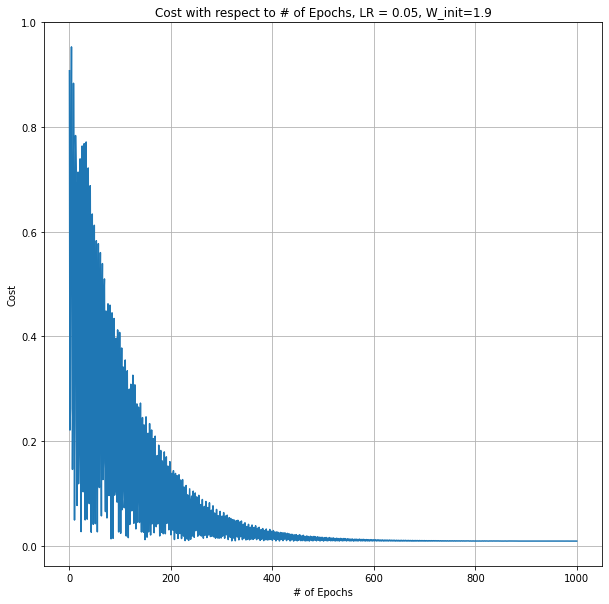

In [160]:
for w in [0.1, 0.5, 1.5, 1.9]:
  alpha = 0.05
  epochs = 1000
  W, B, E = updateParams(w, 0, x, y, alpha, epochs)
  plot_cost_wrt_epochs(E, alpha, w)

**Conclusion**

More instances converge with momentum than without it. The reason for this lies in the momentum function given.
More precisely, the reason lies in how smaller extremas are passed in favour of a larger (potentially global) extrema. 

To build a simple understanding of what was said, imagine that you're at the at the top of a very large hill. At this point, you have alot of potential energy stored up. Once you began your descent via a skateboard for example, the potential energy turns into kinetic energy, and in the further you go down, the larger your momentum becomes. Now, what happens when you reach a small dip (convex)? Given that your momentum is high enough, you pass over the dip and continue riding until you reach a dip with a significantly large slope. At this point, you simple just oscillate until a stop condition is met.

Now this explaination is pretty simple, but it should demonstrate what I'm attempting to state. 

To understand why, lets take a look at the momentum equation

$$ m_{t+1, p} = \mu \cdot m_{t,p} + \frac{\partial{L}}{\partial{P}} $$

aswell as the parameter update equation.

$$ p_{t+1} = p {t} - \alpha \cdot m_{t+1, p} $$

In the momentum equation, we see that the previous momentum is used in the calculation of the current momentum.
The momentum will continue increasing given that the parameter changes in the same direction, if it doesn't, the 
momentum decays. If momentum is great enough, certain parameter values will jump signifcantly in order to reach a potentially "better" extrema (as demonstrated by the oscillation in the above graphs). 

## Question 8.f)

In [164]:
def updateParams(w: np.ndarray, b: np.ndarray, X: np.ndarray, Y: np.ndarray, alpha: float, epochs: int, mu: float = 0.99) -> WEIGHT_BIAS_PAIR:
  w_vec = np.zeros(shape=(epochs+1,))
  b_vec = np.zeros(shape=(epochs+1,))
  error_vec = np.zeros(shape=(epochs+1,))

  w_vec[0] = w;
  b_vec[0] = b;

  error_vec[0] = cost(w, b, (X, Y), "square")

  for i in range(1, epochs+1):
    index = np.random.choice(len(X), size=(1,))
    X_sample = X[index]
    Y_sample = Y[index]
    w_deriv = computeDeriv_dC_dw(b, w, X_sample, Y_sample)
    b_deriv = computeDeriv_dC_db(b, w, X_sample, Y_sample)

    w = w_vec[i] = w - alpha * w_deriv 
    b = b_vec[i] = b - alpha * b_deriv 

    error_vec[i] = cost(w, b, (X_sample, Y_sample), "square")

  return w_vec, b_vec, error_vec 

FINAL PARAMETERS W=2.013157561144233 B=0.9067934916124671 C=0.0002520266169596063
FINAL PARAMETERS W=-1.9880954185171078 B=-0.9483289733422258 C=0.0011170189983656822
FINAL PARAMETERS W=1.9833275923353422 B=0.9528541886151563 C=0.0072242929852436135
FINAL PARAMETERS W=2.0066851477534993 B=0.9314559233404325 C=0.0002639834243356772


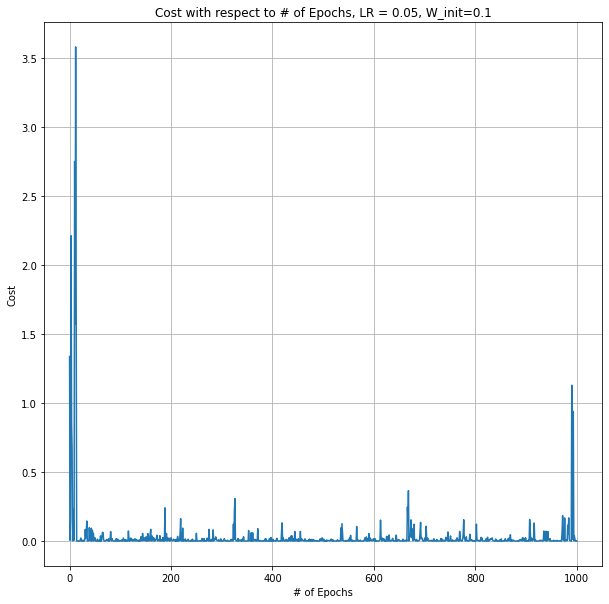

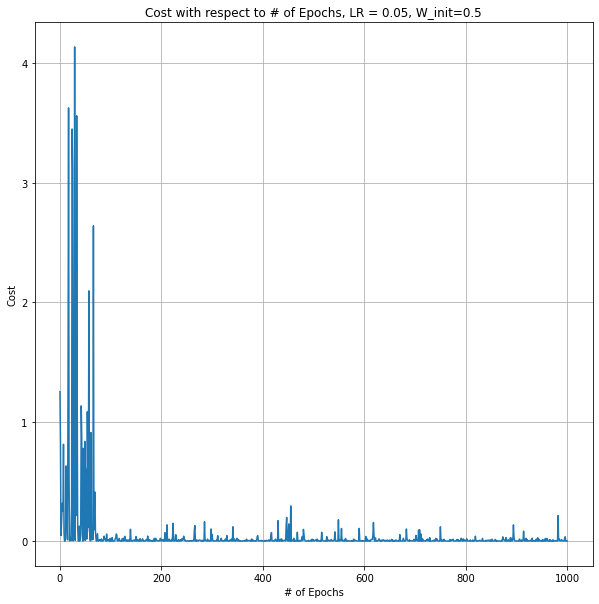

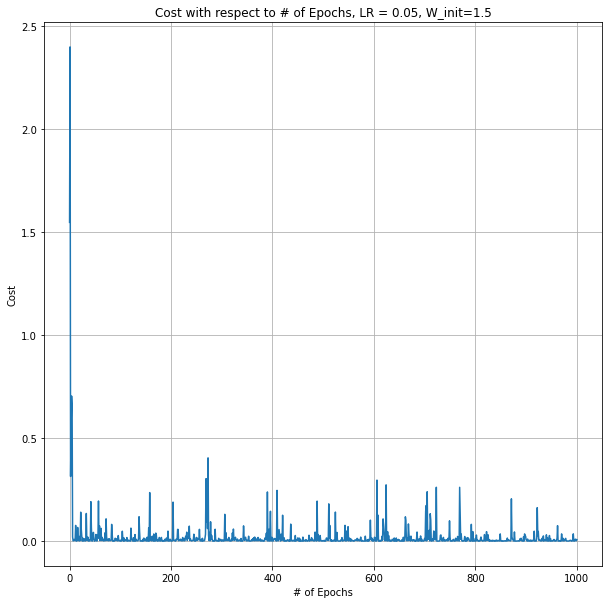

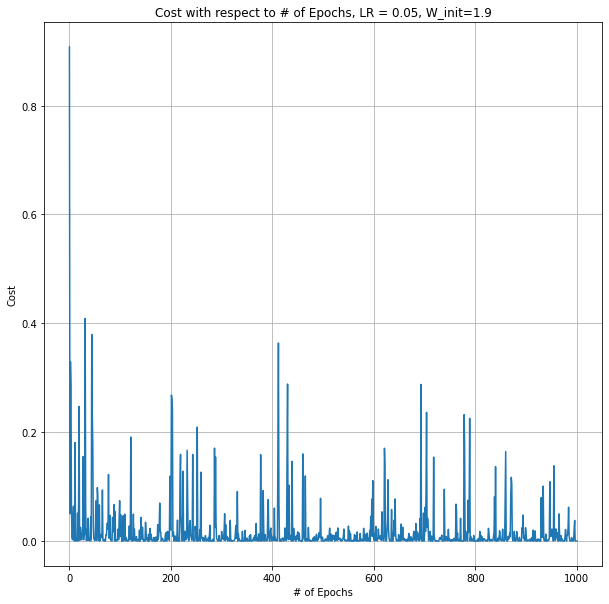

In [166]:
for w in [0.1, 0.5, 1.5, 1.9]:
  alpha = 0.05
  epochs = 1000
  W, B, E = updateParams(w, 0, x, y, alpha, epochs)
  plot_cost_wrt_epochs(E, alpha, w)
  print(f"FINAL PARAMETERS W={W[-1]} B={B[-1]} C={E[-1]}")

**Conclusion**

The method does improve convergence.

## Question 8.g)

In [167]:
def updateParams(w: np.ndarray, b: np.ndarray, X: np.ndarray, Y: np.ndarray, alpha: float, epochs: int, mu: float = 0.99) -> WEIGHT_BIAS_PAIR:
  m_w_vec = np.zeros(shape=(epochs + 1))
  m_b_vec = np.zeros(shape=(epochs + 1))

  w_vec = np.zeros(shape=(epochs+1,))
  b_vec = np.zeros(shape=(epochs+1,))
  error_vec = np.zeros(shape=(epochs+1,))

  m_w = 0
  m_b = 0

  m_w_vec[0] = m_w;
  m_b_vec[0] = m_b;

  w_vec[0] = w;
  b_vec[0] = b;

  error_vec[0] = cost(w, b, (X, Y), "square")

  for i in range(1, epochs+1):
    index = np.random.choice(len(X), size=(1,))
    X_sample = X[index]
    Y_sample = Y[index]

    w_deriv = computeDeriv_dC_dw(b, w, X_sample, Y_sample)
    b_deriv = computeDeriv_dC_db(b, w, X_sample, Y_sample)

    m_w = m_w_vec[i] = mu * m_w_vec[i - 1] + w_deriv
    m_b = m_b_vec[i] = mu * m_b_vec[i - 1] + b_deriv

    w = w_vec[i] = w - alpha * m_w
    b = b_vec[i] = b - alpha * m_b

    error_vec[i] = cost(w, b, (X_sample, Y_sample), "square")

  return w_vec, b_vec, error_vec 

FINAL PARAMETERS W=-154.16701803625483 B=-155.112398302916 C=0.003484422878229652
FINAL PARAMETERS W=-504.8812558319369 B=-224.35804632791664 C=0.07996323093476149
FINAL PARAMETERS W=359.825086953843 B=139.49281375213312 C=1.7147929258273018
FINAL PARAMETERS W=-265.547585356582 B=-25.065280540452633 C=0.1226146829322165


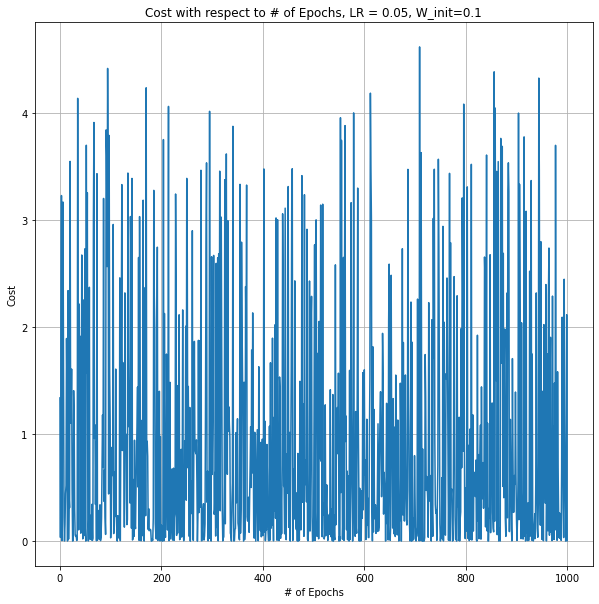

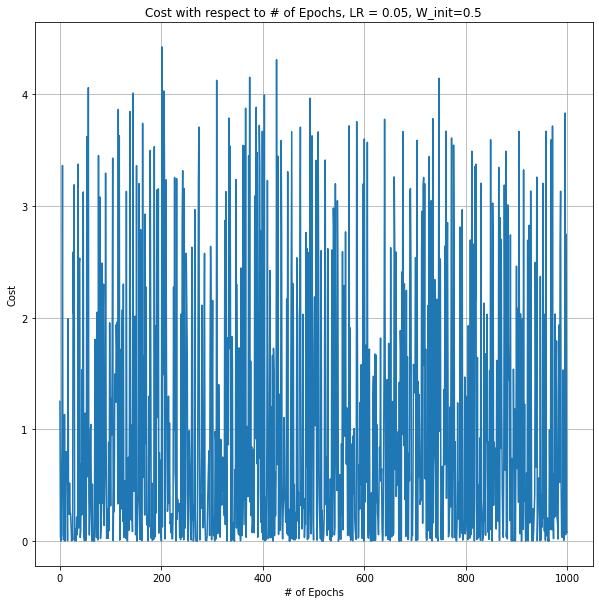

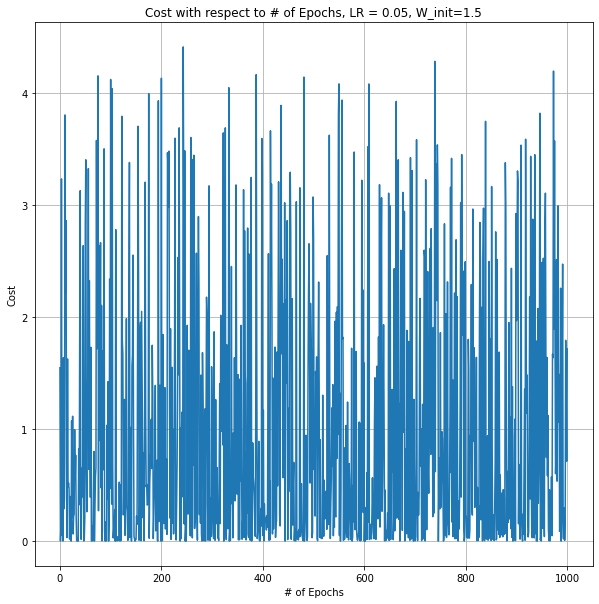

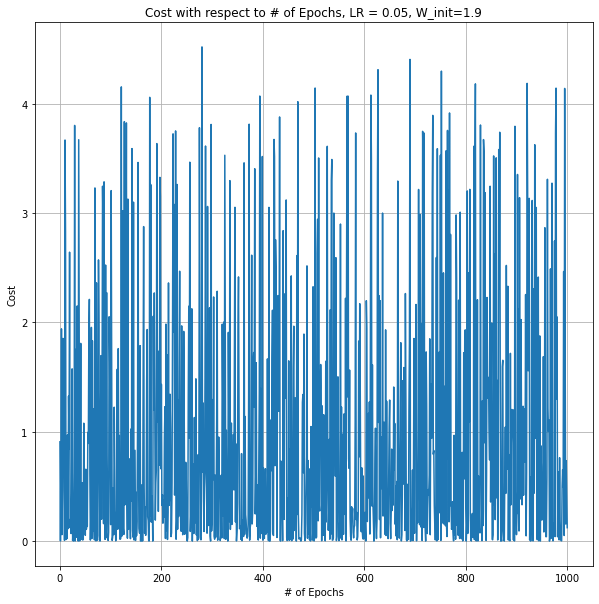

In [168]:
for w in [0.1, 0.5, 1.5, 1.9]:
  alpha = 0.05
  epochs = 1000
  W, B, E = updateParams(w, 0, x, y, alpha, epochs)
  plot_cost_wrt_epochs(E, alpha, w)
  print(f"FINAL PARAMETERS W={W[-1]} B={B[-1]} C={E[-1]}")

FINAL PARAMETERS W=1.5668988674525626 B=-3.9067255304613964 C=1.4812520475455906
FINAL PARAMETERS W=1.6902948234566357 B=3.7155003179577997 C=0.8032908225435316
FINAL PARAMETERS W=1.9954543139298353 B=0.9470756549133753 C=0.02431130719361243
FINAL PARAMETERS W=2.014536247961436 B=0.9516139613132683 C=0.0007148708793791746


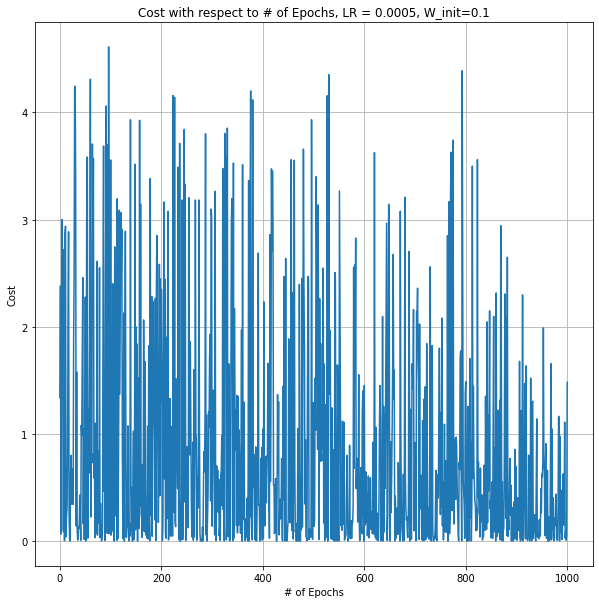

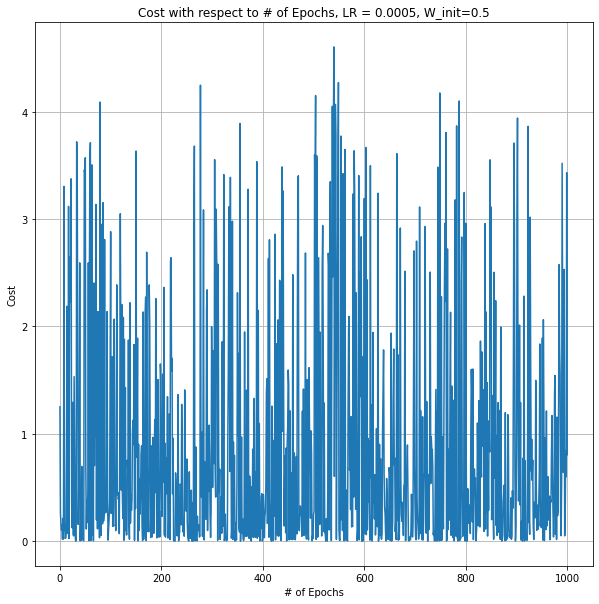

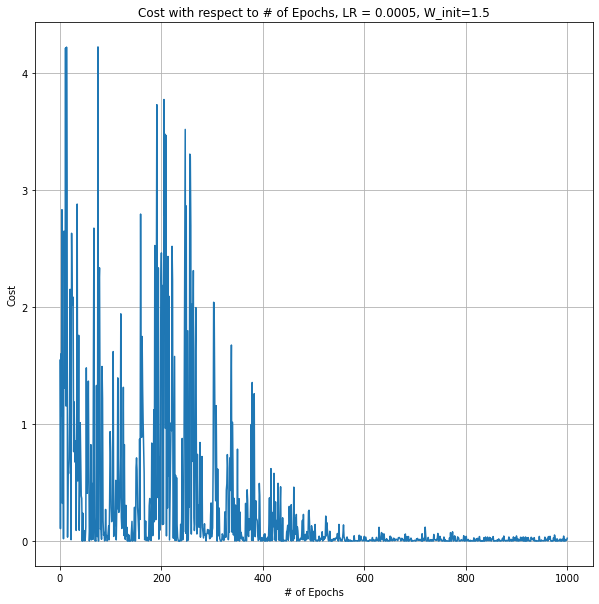

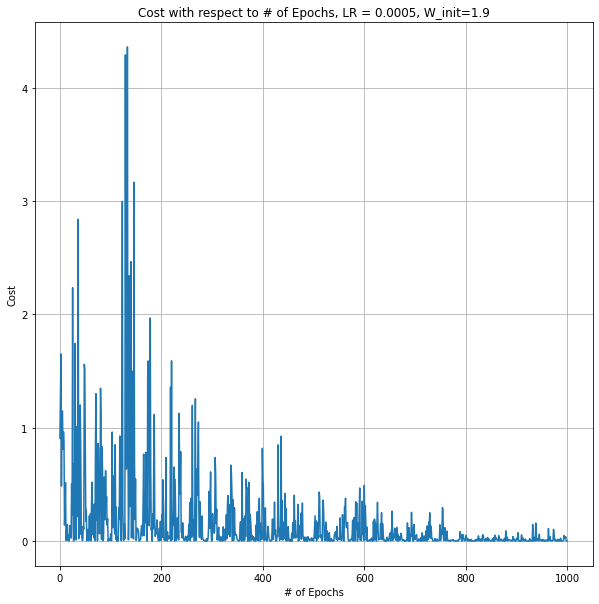

In [169]:
for w in [0.1, 0.5, 1.5, 1.9]:
  alpha = 0.0005
  epochs = 1000
  W, B, E = updateParams(w, 0, x, y, alpha, epochs)
  plot_cost_wrt_epochs(E, alpha, w)
  print(f"FINAL PARAMETERS W={W[-1]} B={B[-1]} C={E[-1]}")

**Conclusion**

When using momentum with stochastic gradient descent with the same learning rate as before, we find that while the cost remains relatively low, the weight and bias are signicantly different (multiple orders of magnitude different). This is likely during the periodicity associated with trigonometric function. In other words, the algorithm looks significantly beyond its immediate surroundings and jumps from parameter value to parameter value in a noteworthy way. 

This is not the case as the learning rate decrease to $0.0005$. In the beginning they're is a lot of sporadicity, however, this dies down as the number of epochs increase.  